<a href="https://colab.research.google.com/github/sapiotee54/Python-projects/blob/main/Copy_of_census_analysis_part_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read the data into the notebook
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/census12.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#view the data
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Castor Lane,Lisa,Moore,20,Head,Single,Female,University Student,None,Catholic
1,2,Castor Lane,Leah,Cross,61,Head,Married,Female,Research scientist (physical sciences),None,Methodist
2,2,Castor Lane,Elliott,Cross,59,Husband,Married,Male,"Production assistant, television",None,Methodist
3,3,Castor Lane,Vanessa,Harris,19,Head,Married,Female,University Student,None,None
4,3,Castor Lane,Glen,Harris,19,Husband,Married,Male,University Student,None,None


In [ ]:
#summarize the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10754 non-null  int64 
 1   Street                         10754 non-null  object
 2   First Name                     10754 non-null  object
 3   Surname                        10754 non-null  object
 4   Age                            10754 non-null  object
 5   Relationship to Head of House  10754 non-null  object
 6   Marital Status                 8160 non-null   object
 7   Gender                         10754 non-null  object
 8   Occupation                     10754 non-null  object
 9   Infirmity                      10754 non-null  object
 10  Religion                       8108 non-null   object
dtypes: int64(1), object(10)
memory usage: 924.3+ KB


In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')#this replaces non numeric values with NaN
#fill NaN with the median value
median_val = df['Age'].median()
df['Age'] = (df['Age'].fillna(median_val)
              .round(0)
             .astype(int))

In [ ]:
#checking for the data type of Age
df['Age'].dtype

dtype('int64')

In [ ]:
#looking into marital status column for null values
mar_df = df.loc[df['Marital Status'].isnull()]
mar_df['Age'].unique() #check the ages of those with Marital Status null

array([ 6,  4,  2,  9,  0, 15, 11,  3,  5, 12, 17, 14, 13,  1, 10,  8, 16,
        7])

In [ ]:
#since all their ages are below 18, I will replace them by None
df['Marital Status'] = df['Marital Status'].fillna('Single')

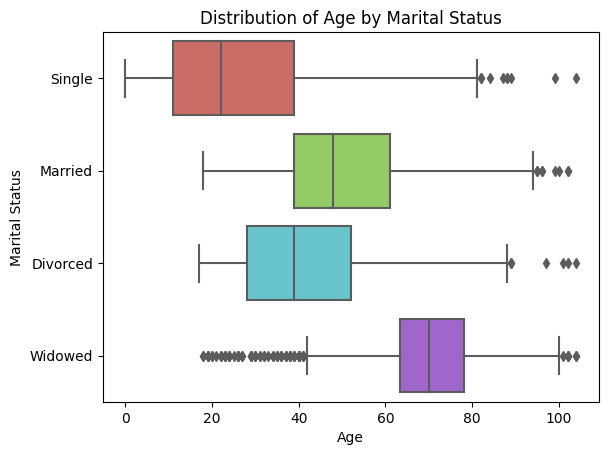

In [ ]:
#checking for outliers in Age using boxplot
sns.boxplot(x=df['Age'], y= df['Marital Status'],palette='hls').set(title = "Distribution of Age by Marital Status")
#save the plot as png
plt.savefig("boxplot.png")

In [ ]:
#statistical summary of the Age column
df['Age'].describe()

count    10754.000000
mean        35.675749
std         21.407483
min          0.000000
25%         18.000000
50%         35.000000
75%         51.000000
max        104.000000
Name: Age, dtype: float64

In [ ]:
#from the boxplot checking for anomaly values in Single and Widowed Marital status category
df.loc[(df['Age']>70) & (df['Marital Status']=='Single')].head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
591,34,Conifer Street,Marian,Parry,74,Head,Single,Female,Retired Armed forces technical officer,None,Christian
635,32,Williams Route,Rita,Clark,77,Head,Single,Female,Retired Medical physicist,None,Methodist
673,12,Barry Lodge,Amber,Davidson,73,Head,Single,Female,"Retired Engineer, agricultural",None,None
698,29,Barry Lodge,Ruth,Hart,78,Head,Single,Female,"Retired Surveyor, building",None,Christian
824,2,Scott Drive,Leon,Hall,81,Head,Single,Male,Retired Quality manager,None,Methodist


In [ ]:
#The above filtered dataframe seem perfect, though surprising, as a lot of old people claimed Single

In [ ]:
#from the above filtered dataframe, an observation from row index 8385 and 8386 has both persons are partners
#House Number, Relationship to Head of House were consistent.

In [ ]:
#under the Widowed Category of Marital Status
df.loc[(df['Age']<=18) & (df['Marital Status']=='Widowed')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2688,23,Junerush Crescent,Irene,Hill,18,Lodger,Widowed,Female,Student,None,NaN
8557,3,Evans Loop,Philip,Evans,18,Son,Widowed,Male,Student,None,None


In [ ]:
#replacing null values with None
df['Marital Status'].fillna('None',inplace=True)
#likewise for Infirmity
df['Infirmity'].fillna('None',inplace=True)
#same goes to Religion
df['Religion'].fillna('None',inplace=True)

In [ ]:
#checking for values in Gender Column
df['Gender'].value_counts()

Female    5637
Male      5114
             3
Name: Gender, dtype: int64

In [ ]:
#view in dataframe Gender with empty strings
df.loc[df['Gender']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2572,7,Junerush Crescent,Mathew,Palmer,28,Son,Single,,Health and safety adviser,None,Catholic
2884,52,Junerush Crescent,Tom,Scott,14,Son,Single,,Student,None,None
7350,40,Newcastle Lane,Carole,Fletcher,12,Daughter,Single,,Student,None,None


In [ ]:
#replacing empty strings based on Relationship to Head of House values
df.loc[[2572,2884],'Gender']='Male'
df.loc[[7350],'Gender']='Female'

In [ ]:
df['Relationship to Head of House'].value_counts()

Head                     3711
Son                      1853
Daughter                 1797
Husband                  1121
None                      766
Lodger                    434
Wife                      376
Partner                   305
Grandson                   95
Granddaughter              81
Sibling                    41
Cousin                     36
Visitor                    33
Step-Daughter              25
Adopted Son                22
Adopted Daughter           16
Nephew                     15
Step-Son                   14
Neice                       9
                            2
Adopted Granddaughter       1
Daughter-in-law             1
Name: Relationship to Head of House, dtype: int64

In [ ]:
df.loc[df['Relationship to Head of House']==" "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1654,12,Guitar Highway,Harry,Tyler,51,,Single,Male,"Surveyor, rural practice",None,None
3795,159,Ali View,Judith,Ball,43,,Single,Female,Theatre manager,None,None


In [ ]:
#checking the house number and  street, because this will be easier to conclude on the value to fill in null missing
df.loc[(df['House Number']==159) & (df['Street']=='Ali View')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3795,159,Ali View,Judith,Ball,43,,Single,Female,Theatre manager,None,None
3796,159,Ali View,Benjamin,Smith,43,Partner,Single,Male,Hydrogeologist,None,None
3797,159,Ali View,Carl,Ball,11,Son,Single,Male,Student,None,None
3798,159,Ali View,Maria,Ball,8,Daughter,Single,Female,Student,None,None


In [ ]:
#checking the house number and  street, because this will be easier to conclude on the value to fill in null missing
df.loc[(df['House Number']==12) & (df['Street']=='Guitar Highway')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1654,12,Guitar Highway,Harry,Tyler,51,,Single,Male,"Surveyor, rural practice",None,None


In [ ]:
#replacing null values with Head after careful evaluation
df.loc[[3795,1654],'Relationship to Head of House']='Head'


In [ ]:
df.loc[(df['House Number']==159) & (df['Street']=='Ali View')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3795,159,Ali View,Judith,Ball,43,Head,Single,Female,Theatre manager,None,None
3796,159,Ali View,Benjamin,Smith,43,Partner,Single,Male,Hydrogeologist,None,None
3797,159,Ali View,Carl,Ball,11,Son,Single,Male,Student,None,None
3798,159,Ali View,Maria,Ball,8,Daughter,Single,Female,Student,None,None


In [ ]:
#check for empty strings in Infirmity
df.loc[df['Infirmity']==" "].head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
605,10,Williams Route,Kate,Chandler,46,Head,Single,Female,"Secretary, company",,Sikh
2874,51,Junerush Crescent,Craig,Wright,27,Son,Divorced,Male,Event organiser,,None
2998,8,Anglia Courts,Joanna,Ali,39,Head,Single,Female,TEFL teacher,,None
3138,15,Doyle Plaza,Chelsea,Dyer,5,Daughter,Single,Female,Student,,None
4390,83,Salmontooth Crescent,Stewart,Miles,3,Son,Single,Male,Child,,None


In [ ]:
#replacing all empty strings with None
df['Infirmity'].replace(" ","None", inplace = True)

In [ ]:
#check for missing values in Occupation column
df.loc[df['Occupation']==" "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4085,30,Field Extension,Paula,Fletcher,63,Head,Single,Female,,None,Christian


In [ ]:
#From her age,she is not upto retirement age, so i will replace the NaN by Unemployed
df.loc[4085,'Occupation']='Unemployed'

In [ ]:
#view a summary of the dataframe again to the cleanup done so far
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10754 non-null  int64 
 1   Street                         10754 non-null  object
 2   First Name                     10754 non-null  object
 3   Surname                        10754 non-null  object
 4   Age                            10754 non-null  int64 
 5   Relationship to Head of House  10754 non-null  object
 6   Marital Status                 10754 non-null  object
 7   Gender                         10754 non-null  object
 8   Occupation                     10754 non-null  object
 9   Infirmity                      10754 non-null  object
 10  Religion                       10754 non-null  object
dtypes: int64(2), object(9)
memory usage: 924.3+ KB


In [ ]:
#bins for a new column of age_categories
d_bins=[-1,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,104]

In [ ]:
#labellings the bins
cat_labels= ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-89','90+']

In [ ]:
#new column with the bins and the labels
df['Age_group'] = pd.cut(df['Age'],bins= d_bins,labels = cat_labels)

In [ ]:
#Creating new columns for Male counts
df.loc[(df['Gender']=='Male','Male')]=1
#Creating new columns for Female counts
df.loc[(df['Gender']=='Female','Female')]=1

In [ ]:
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_group,Male,Female
0,1,Castor Lane,Lisa,Moore,20,Head,Single,Female,University Student,None,Catholic,20-24,NaN,1.0
1,2,Castor Lane,Leah,Cross,61,Head,Married,Female,Research scientist (physical sciences),None,Methodist,60-64,NaN,1.0
2,2,Castor Lane,Elliott,Cross,59,Husband,Married,Male,"Production assistant, television",None,Methodist,55-59,1.0,NaN
3,3,Castor Lane,Vanessa,Harris,19,Head,Married,Female,University Student,None,None,15-19,NaN,1.0
4,3,Castor Lane,Glen,Harris,19,Husband,Married,Male,University Student,None,None,15-19,1.0,NaN


In [ ]:
#generate a dataframe with for Gender and its percentage
Gender_df = pd.DataFrame(df['Gender'].value_counts().reset_index()
.rename(columns={"index":"Gender","Gender":"Count"}))
#add percentage to the data frame
Gender_df['percent']=  (Gender_df['Count']/Gender_df['Count'].sum()*100).round(2)
#print Gen_df
Gender_df

,Gender,Count,percent
0,Female,5638,52.43
1,Male,5116,47.57


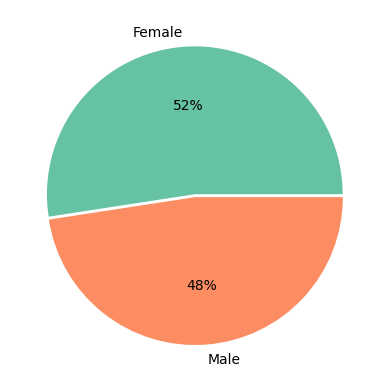

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the pie chart
data_pie = Gender_df['Count']#values for each sector
la = Gender_df['Gender'] #pie chart sector labels
colors = sns.color_palette('Set2')[0:7]#add colour
plt.pie(data_pie, labels = la, colors = colors,explode=[0,0.02], autopct='%.0f%%')
plt.show()
plt.savefig("pie1.png");

In [ ]:
#creating DataFrame to plot population pyramide
pop_pyr = pd.DataFrame(df.groupby("Age_group")[["Age","Male","Female"]].count())
#resetindex of the DataFrame
pop_pyr= pop_pyr.reset_index()

In [ ]:
#view the pop_pyramide
pop_pyr.head()

,Age_group,Age,Male,Female
0,0-4,625,324,301
1,5-9,715,380,335
2,10-14,740,381,359
3,15-19,857,416,441
4,20-24,817,410,407


In [ ]:
#import ploty library for plotting chart
import plotly.graph_objects as gp

In [ ]:
#Assigning variables for the population pyramide chart
y_age = pop_pyr['Age_group']
xM = pop_pyr['Male']
xF = pop_pyr['Female'] * -1

In [ ]:
# Creating instance of the figure
fig = gp.Figure()
# Adding Male data to the figure
fig.add_trace(gp.Bar(y= y_age, x = xM,
                     name = 'Male',
                     orientation = 'h'))
# Adding Female data to the figure
fig.add_trace(gp.Bar(y = y_age, x = xF,
                     name = 'Female', orientation = 'h'))
# Updating the layout for our graph
fig.update_layout(title = 'Population Pyramid',
                  title_font_size = 24,
                  template='plotly_white',
                  barmode='relative',
                  bargap = 0.0,
                  xaxis = dict(
                        tickvals=[-400,-300,-200,-100,0,100,200,300,400],
                        ticktext=['4H','3H','2H','1H','0','1H','2H','3H','4H'],#the H represents Hundreds
                      title_font_size = 14
                  )
            )
fig.show()
plt.savefig("pop_pyramide.png")

<Figure size 640x480 with 0 Axes>

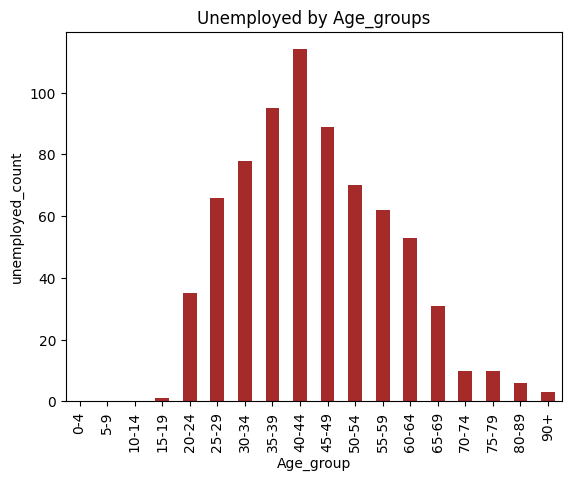

In [ ]:
#number of unemployed in each Age categories
Unemp = (df.groupby('Age_group')['Occupation'].apply(lambda x: (x=='Unemployed')
                                .sum()))

Unemp.plot(kind='bar',title="Unemployed by Age_groups",
                     ylabel='unemployed_count', color='brown');
plt.savefig("unemployed_persons.png")

In [ ]:
#view relgion categery by count
df['Religion'].value_counts()

None         6338
Christian    2297
Catholic     1112
Methodist     734
Muslim        149
Sikh           72
Jewish         40
Orthodoxy       4
Sith            2
Quaker          2
Bahai           2
Baptist         1
Hindu           1
Name: Religion, dtype: int64

In [ ]:
#group catholics,Methodist and Baptist together, and renaming them as Christians
df['Religion'].replace(['Catholic','Methodist','Baptist'],'Christian', inplace =True)

In [ ]:
#religion by count
rel_df = pd.DataFrame(df['Religion'].value_counts().reset_index()
.rename(columns={"index":"religion","Religion":"count"}))
#add percentage to the data frame
rel_df['percent']=  (rel_df['count']/rel_df['count'].sum()*100).round(2)
#print rel_df
rel_df

,religion,count,percent
0,None,6338,58.94
1,Christian,4144,38.53
2,Muslim,149,1.39
3,Sikh,72,0.67
4,Jewish,40,0.37
5,Orthodoxy,4,0.04
6,Sith,2,0.02
7,Quaker,2,0.02
8,Bahai,2,0.02
9,Hindu,1,0.01


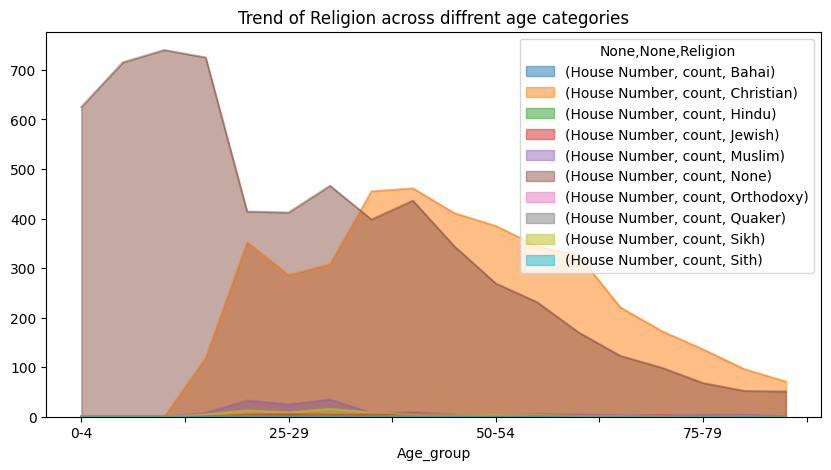

<Figure size 640x480 with 0 Axes>

In [ ]:
#plotting stacked bar chart to see how religion trend across the age categories
(df.pivot_table(index=["Age_group"],columns=["Religion"],aggfunc ={"House Number":['count']}).
plot.area(stacked=False,figsize = (10,5)))
plt.title('Trend of Religion across diffrent age categories')
plt.show()
plt.savefig('rel_age.png')

In [ ]:
Mar_df = pd.DataFrame(df['Marital Status'].value_counts().reset_index()
.rename(columns={"index":"Marital Status","Marital Status":"Count"}))
#add percentage to the data frame
Mar_df['percent']=  (Mar_df['Count']/Mar_df['Count'].sum()*100).round(2)
#print Mar_df
Mar_df

,Marital Status,Count,percent
0,Single,6355,59.09
1,Married,3006,27.95
2,Divorced,947,8.81
3,Widowed,446,4.15


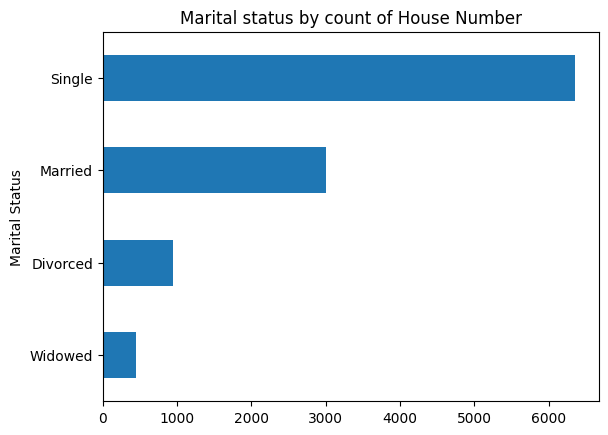

In [ ]:
(df.groupby(['Marital Status'])['House Number'].
 count().sort_values(ascending=True)).plot.barh(title="Marital status by count of House Number");
plt.savefig("marbar1.png")

In [ ]:
#creating a data frame to get the number of occupants based on each House number
occupancy_data = (df.groupby(['Street','House Number'])['First Name'].
 count())
occupancy_data=occupancy_data.to_frame().reset_index()
#replacing First Name by count of Occupants
occupancy_data =occupancy_data.rename(columns = {'First Name':'Count_of_occupants'})
#show data frame
occupancy_data.head()

,Street,House Number,Count_of_occupants
0,Alba Avenue,1,6
1,Alba Avenue,2,5
2,Alba Avenue,3,2
3,Alba Avenue,4,5
4,Alba Avenue,5,5


In [ ]:
#Average count of occupants per house
occupancy_data['Count_of_occupants'].mean().round(0)

3.0

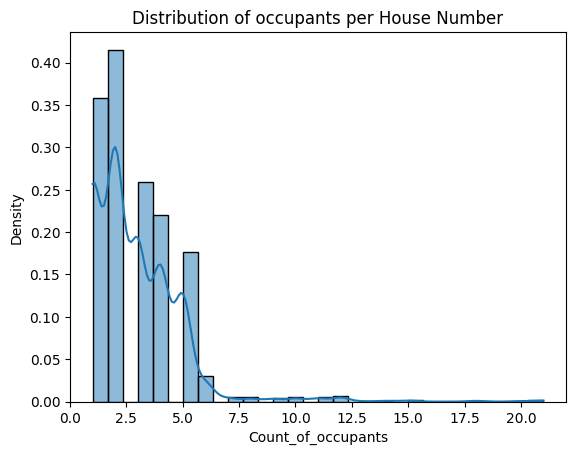

In [ ]:
#visualizing the distribution of number of occupants per House Number in the different streets
sns.histplot(occupancy_data['Count_of_occupants'],kde=True, bins = 30,stat="density")
plt.title('Distribution of occupants per House Number');
plt.savefig('kde.png')

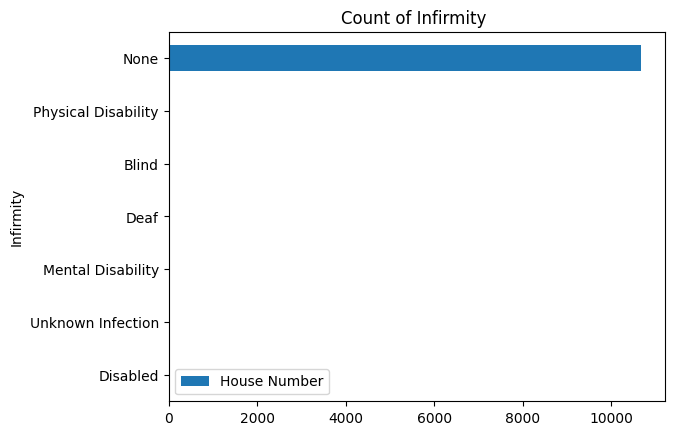

<Figure size 640x480 with 0 Axes>

In [ ]:
#getting a count of each categories of Infirmities
pd.DataFrame(df.groupby('Infirmity')['House Number'].count().sort_values(ascending=True)).plot.barh()
plt.title('Count of Infirmity ')
plt.show();
plt.savefig('infirmity.png')

In [ ]:
#Occupations that require daily commutting
daily_commuters = df[~df['Occupation'].str.contains("Retired|Unemployed|Child")]
count_daily_commuters = daily_commuters['Occupation'].count().sum()
#occupation that require less daily commutting
non_daily_commuters = df[df['Occupation'].str.contains("Retired|Unemployed|Child")]
count_non_daily_commuters = non_daily_commuters['Occupation'].count().sum()


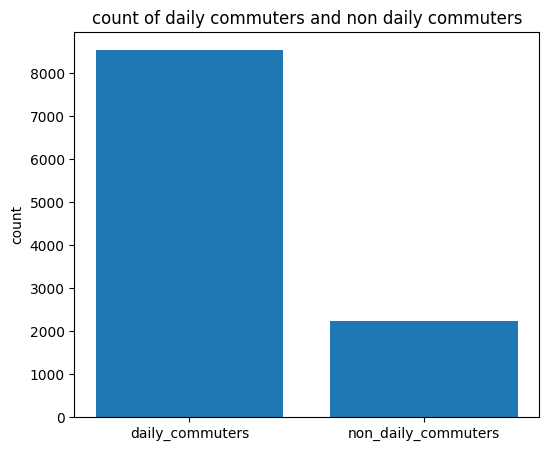

In [ ]:
# creating a plot to visualize daily and non_daily commutters

label_com = ['daily_commuters','non_daily_commuters']
values = [count_daily_commuters,count_non_daily_commuters]
fig = plt.figure(figsize = (6,5))
# creating the bar plot
plt.bar(label_com,values)
plt.ylabel("count")
plt.title("count of daily commuters and non daily commuters")
plt.savefig("commuters.png");


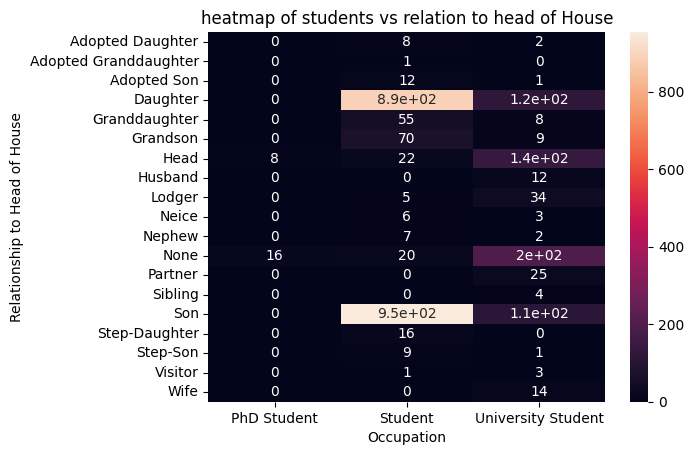

In [ ]:
#a look at the number of Students in the census
df_student = df[df["Occupation"].str.contains("Student")]
(df_student.groupby('Occupation')['House Number'].count()).sum()
#crosstab the students and Head of House relationship
sns.heatmap(pd.crosstab(df_student['Relationship to Head of House'],df_student["Occupation"]),annot=True)
plt.title("heatmap of students vs relation to head of House")
plt.savefig('student vs rel.png')

***Exercise 1***

In [ ]:
# Calculate Birth rate
#get all women from the dataframe
women_data = df.loc[df['Gender']=='Female']
#count the number of ages = 0
age_zero = (women_data['Age']==0).sum()
#getting all women of age 25 to 29
child_bearing_age = ((women_data['Age']>=25) & (women_data['Age']<=29)).sum()


In [ ]:
#birth rate per 100000
birth_rate = ((age_zero/child_bearing_age)*100000).round(0)
print(birth_rate)


11275.0


**Exercise 2**

In [ ]:
#Calculating Evolving birth rate.
#get age of children aged 4
age_four = (df['Age']==4).sum()
#getting all women of age 30-34
child_bearing_age1 = ((women_data['Age']>=30) & (women_data['Age']<=34)).sum()



In [ ]:
#evolving birth rate
evol_birth_rate = ((age_four/child_bearing_age1)*100000).round(0)
print(evol_birth_rate)

32479.0


**question 3**

In [ ]:
#calculating for  death rate
old_age = ((df['Age']>=56) & (df['Age']<=60)).sum()
old_age1 = ((df['Age']>=61) & (df['Age']<=65)).sum()

In [ ]:
death1 = ((old_age-old_age1)/(old_age+old_age1))
#death rate per annum per 100000
death_rate = ((death1/5)*100000).round(0)
print(death_rate)

1676.0


**Exercise 4i**

In [ ]:
#repeating the same procedure for older ages
old_age2 = ((df['Age']>=66) & (df['Age']<=70)).sum()
old_age3 = ((df['Age']>=71) & (df['Age']<=75)).sum()

In [ ]:
death2 = ((old_age2-old_age3)/(old_age2+old_age3))
#death rate per annum per 100000
death_rate1 = ((death1/5)*100000).round(0)
print(death_rate1)

1676.0


**Exercise 4ii**

In [ ]:
#repeating for older age
old_age4 = ((df['Age']>=76) & (df['Age']<=80)).sum()
old_age5 = ((df['Age']>=81) & (df['Age']<=85)).sum()
death3 = ((old_age4-old_age5)/(old_age4+old_age5))
#death rate per annum per 100000
death_rate2 = ((death3/5)*100000).round(0)
print(death_rate2)

3481.0


In [ ]:
old_age6 = ((df['Age']>=86) & (df['Age']<=90)).sum()
old_age7 = ((df['Age']>=91) & (df['Age']<=95)).sum()
death4 = ((old_age6-old_age7)/(old_age6+old_age7))
#death rate per annum per 100000
death_rate3 = ((death4/5)*100000).round(0)
print(death_rate3)

9767.0


In [ ]:
old_age8 = ((df['Age']>=96) & (df['Age']<=100)).sum()
old_age9 = ((df['Age']>=101) & (df['Age']<=105)).sum()
death5 = ((old_age8-old_age9)/(old_age8+old_age9))
#death rate per annum per 100000
death_rate4 = ((death1/5)*100000).round(0)
print(death_rate4)

1676.0


**Exercise 4iii**

In [ ]:
#Exercise 4iii
total_death_rate = death_rate+death_rate1+death_rate2+death_rate3+death_rate4
#show total death rate
print(total_death_rate)

18276.0


**Exercise 5**

In [ ]:
#calculating for immigration using lodgers and visitors
lodgers_visitors = df.loc[(df['Relationship to Head of House']=="Lodgers") | (df['Relationship to Head of House']=="Visitor")]
immi1 = lodgers_visitors['Occupation'].value_counts().sum()

In [ ]:
#Calculating for Emigrants using Divorced marital status
div = df.loc[df['Marital Status']=='Divorced']
emmi1 = div['Relationship to Head of House'].value_counts().sum()

In [ ]:
#Also getting immigrants from students
immi2 = ((df['Occupation'].str.contains('Student')) & (df['Relationship to Head of House']=="Head")).sum()

In [ ]:
#rate of Emmigrants
rate_emi = ((emmi1/df['House Number'].value_counts().sum())*100000).round(0)
print(rate_emi)


8806.0


In [ ]:
#rate of immigrants
rate_immi = (((immi1+immi2)/df['House Number'].value_counts().sum())*100000).round(0)
print(rate_immi)

1841.0


In [ ]:
#population growth
pop_increase = (birth_rate+rate_immi)
#population decrease
pop_decrease = (death_rate+rate_emi)


In [ ]:
#growth difference
pop_increase-pop_decrease

2634.0

**Exercise 6**

In [ ]:
#Calculate typical occupancy,the mean number of people per house for a given street
df_occupancy = (df.groupby(['Street','House Number'])['Surname'].
 count())
df_occupancy=df_occupancy.to_frame().reset_index()
#replacing First Name by count of Occupants
df_occupancy =df_occupancy.rename(columns = {'Surname':'Number_of_occupants'})
house = pd.DataFrame(df_occupancy.groupby(['Street'])['Number_of_occupants'].aggregate(['count','sum','mean'])).reset_index()
house= house.rename(columns={'count':'Total_House_Numbers','sum':'count_House_Members_per_street','mean':'average_occupancy_per_House_Number_per_street'})
house['average_occupancy_per_House_Number_per_street'] =house['average_occupancy_per_House_Number_per_street'].round(0)
house.head()

,Street,Total_House_Numbers,count_House_Members_per_street,average_occupancy_per_House_Number_per_street
0,Alba Avenue,58,331,6.0
1,Albert Crescent,177,442,2.0
2,Ali View,162,423,3.0
3,Anderson Street,19,55,3.0
4,Andrews Rapids,13,34,3.0


In [ ]:

#calculating for the mean of persons occupying each house number per street
house['average_occupancy_per_House_Number_per_street'].value_counts()

3.0     38
2.0     29
4.0     10
1.0      8
7.0      8
5.0      5
6.0      2
12.0     2
9.0      1
21.0     1
10.0     1
Name: average_occupancy_per_House_Number_per_street, dtype: int64

In [ ]:

#calculating the count of number of persons per House Number in the population data
occupancy_data['Count_of_occupants'].value_counts()

2     1028
1      888
3      642
4      545
5      437
6       76
12      17
7       14
11      13
10      13
8       12
9       11
21       4
15       4
14       3
18       3
20       2
13       1
Name: Count_of_occupants, dtype: int64

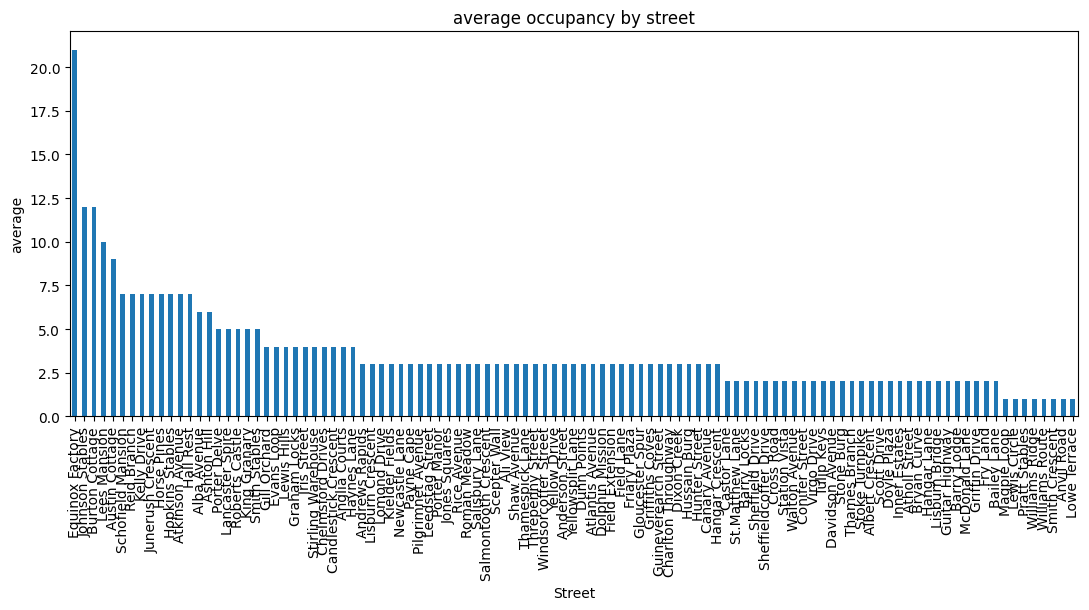

In [ ]:
house_count = house.groupby(['Street'])['average_occupancy_per_House_Number_per_street'].mean().sort_values(ascending=False)
plt.figure(figsize=(13,5))
house_count.plot(kind='bar')
plt.ylabel('average')
plt.xticks(rotation = 90)
plt.title('average occupancy by street')
plt.savefig('average.png')